# Problem and Objective

**Problem**
Decent number of hotel bookings get cancelled. Most common  reasons for cancellations include change of plans and scheduling conflicts etc. This is also made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests. But this is not good for hotel business and affects revenue. Such losses are particularly high on last minute cancellations.


This is a **supervised learning classification task** as we have labeled data with target variable. We would try various models/algos for this classification.

**Objective**
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled.  Our goal is to to analyze the provided data to find which factors have a high influence on cancellations. Based on that we'll build a predictive model that can predict which booking is going to be canceled in advance.

# Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import  XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC

In [3]:
file_path = '/content/drive/MyDrive/5509/INNHotelsGroup.csv'
data = pd.read_csv(file_path)


# Data - Source and Description

**Source**

This is public dataset from Kaggle:
https://www.kaggle.com/datasets/irvifa/innhotelsgroup?select=INNHotelsGroup.csv

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

**Data Dictionary**

**Booking_ID**: unique identifier of each booking

**no_of_adults**: Number of adults

**no_of_children**: Number of Children

**no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan**: Type of meal plan booked by the customer:
Not Selected – No meal plan selected
Meal Plan 1 – Breakfast
Meal Plan 2 – Half board (breakfast and one other meal)
Meal Plan 3 – Full board (breakfast, lunch, and dinner)

**required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time**: Number of days between the date of booking and the arrival date

**arrival_year**: Year of arrival date

**arrival_month**: Month of arrival date

**arrival_date**: Date of the month

**market_segment_type**: Market segment designation.

**repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status**: Flag indicating if the booking was canceled or not.

**Size**

In [4]:
data.shape

(36275, 19)

We have 36725 rows with 18 attributes and 1 target column

# Basic Data Analysis

**Basic Data Information**

In [5]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Missing values, Data Cleanup and Understanding Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

The dataset has **36,275 rows and 19 columns**.

Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type, and booking_status are of object type while rest columns are numeric in nature.

There are no null values in the dataset.

**Booking_ID** column is an identifier. Let's check if each entry of the column is unique.

In [8]:
data.Booking_ID.nunique()

36275

**Observations and Actions:**:

We can see that all the entries of this column are unique. Hence, this column would not add any value to our analysis.

Let's drop this column.

In [9]:
data = data.drop(["Booking_ID"], axis=1)
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**Missing Values**

As seen from data.info, we do not have any missing values for any columns

**Data Imputing**

As all features have non-null values, we do not need to handle any data replacement. All of our features are numeric, so if data was missing we could have used some technique like repalcing with Median value or some other appropriate technique

**Understanding Target**

Let us first look at distribution of values in Target variable and then we would decide if we need some synthetic data if we have too much imbalanced data

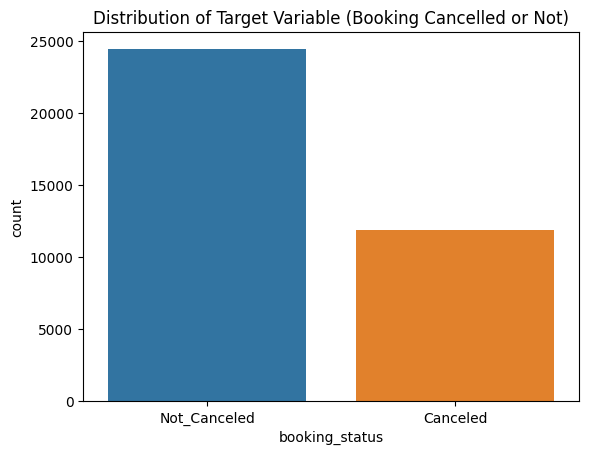

In [10]:
# Count plot for the target variable
sns.countplot(x='booking_status', data=data)
plt.title('Distribution of Target Variable (Booking Cancelled or Not)')
plt.show()

**Observations and actions:**

From above plot it seems we have pretty evenly distributed target variable, we do not need to do any handling here. Data is not imbalanced like in fraud detection etc., so we do can keep data as is. Later on in model building, if we feel the need, we can do weighted classes. But just based on the distribution, it seems good enough.

## Exploratory Data Analysis

In [11]:
#Checking summary statistics for numerical columns
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Summary based on above stats:**

* There are no missing values (non-null) in any features

* Arrival year has only two values 2017 and 2018

* Most of guests have no special requests
* Most of guests spend upto 120/ per night but there are some bookings with higher price. Maybe suite etc. which are normally low number in a give hotel.
* Most of guests tend to stay 2-3 nights but there are some outliers
* Most of guests book upto 4 months in advance but there are some outliers with more than one year in advance
* For most of guests, value for no_of_previous_bookings_not_canceled and no_of_previous_cancellations is zero. This may be because most of them are first time guests

**Data Visualizations**

**Check the distribution and outliers for some columns in the data**


lead_time
Skew : 1.29


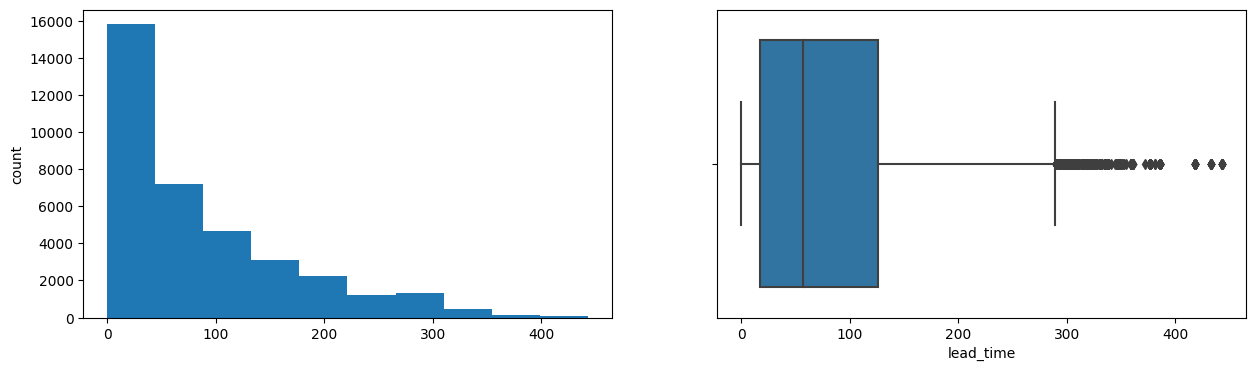

no_of_previous_cancellations
Skew : 25.2


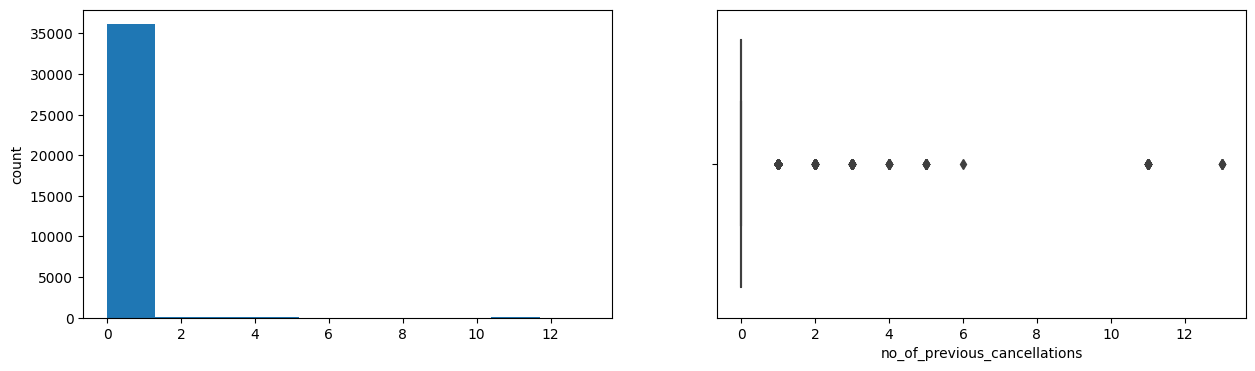

no_of_previous_bookings_not_canceled
Skew : 19.25


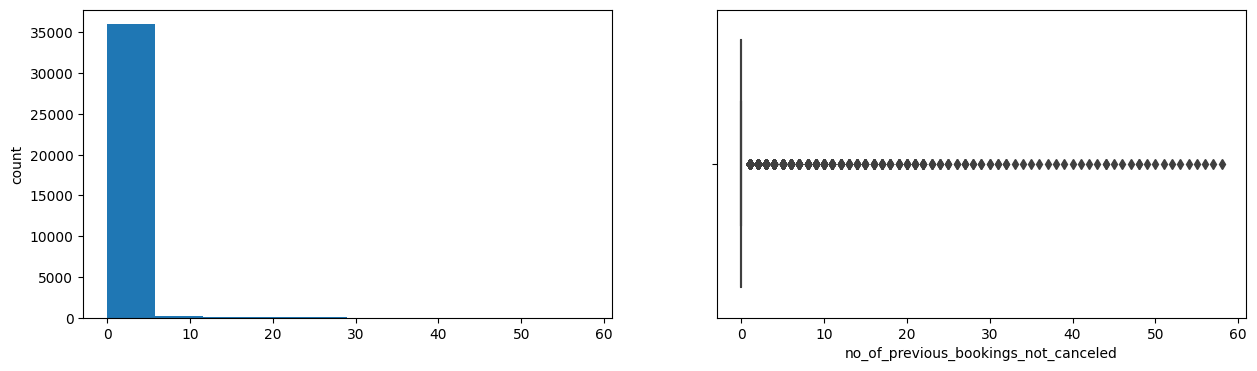

avg_price_per_room
Skew : 0.67


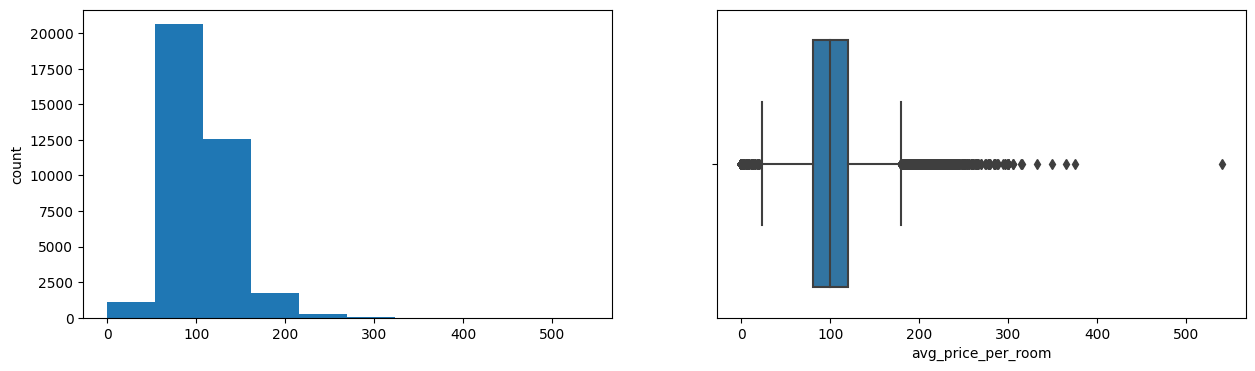

In [12]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observations and Actions:**

* The distribution of lead time is right-skewed. Many customers have made the booking on the same day of arrival as well. There are many outliers, some customers made booking more than 400 days in advance.

* Very few customers have more than one cancellation. Some customers canceled more than 12 times.

* Very few customers have more than 1 booking not canceled previously. Some customers have not canceled their bookings around 60 times.

* The distribution of average price per room is skewed to right. There are outliers on both sides. The median price of a room is around ~100 euros. There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + 1.5 * IQR).


In [13]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [14]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

**Let us explore distribution of values for categorical/ordinal type columns**

In [15]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space',
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests',
        'booking_status']

for i in cat_cols:
    print(data[i].value_counts(normalize=True))
    print('*'*40)

2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: no_of_adults, dtype: float64
****************************************
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64
****************************************
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: no_of_week_nights, dtype: float64
****************************************
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: no_of_weekend_nights, dtype: float64
****************************************
0    0.969014
1    0.030986
Name: required_car_parking_space, dtype: float64
****************************************
Meal Plan 1     0.767

**Observations and Actions:**

* 55% of guests make no specials requests. 43% make 1-2 special requests. There are some outliers with more requests
* 64% come from online bookings, 29% from offline bookings. Only 5% come from corporate bookings
* Room type 1 is reserved by 77% and room type 4 by about 17%. Others types very low request. It may also be that there are far more rooms of type 1 and type 4.
* Meal plan 1 is most popular with about 77% choice
* Most guests stay for 1-3 nights during the week days. On weekends we have very high number of zero nights. It may also be a day hotel or lot of guests chec kout on saturday.
* Most rooms are occupied by 1-2 adults. This hotel also has very high percentage of guests with zero children. It may be more popular with couples or there may not be much children activity in hotel/area
* Only 3% guests requested parking space. Either it is well connected by public transport or most guests take cabs **

**Encode the target variable:**



In [16]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**Bivariate Analysis**

We have done decent univariate analysis. Let us now do some bivariate analysis

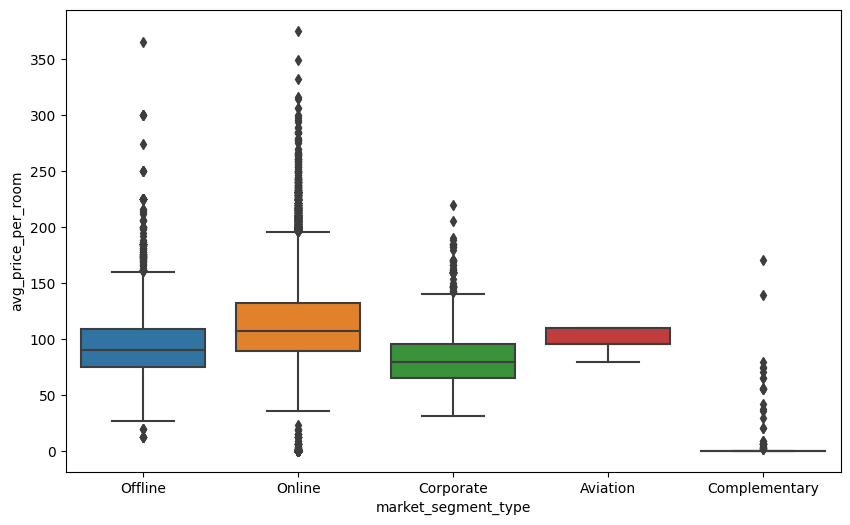

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.show()

**Observations:**

* Rooms booked online have the highest variations in prices.
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status**

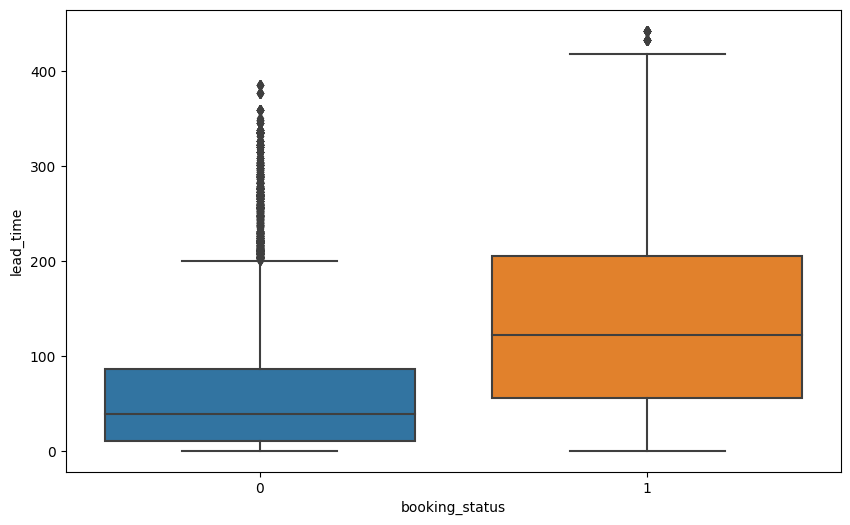

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="booking_status", y="lead_time")
plt.show()

**Observations:**

There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled. The higher the lead time higher is the chances of a booking being canceled.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

<ipython-input-19-10b455f32463>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


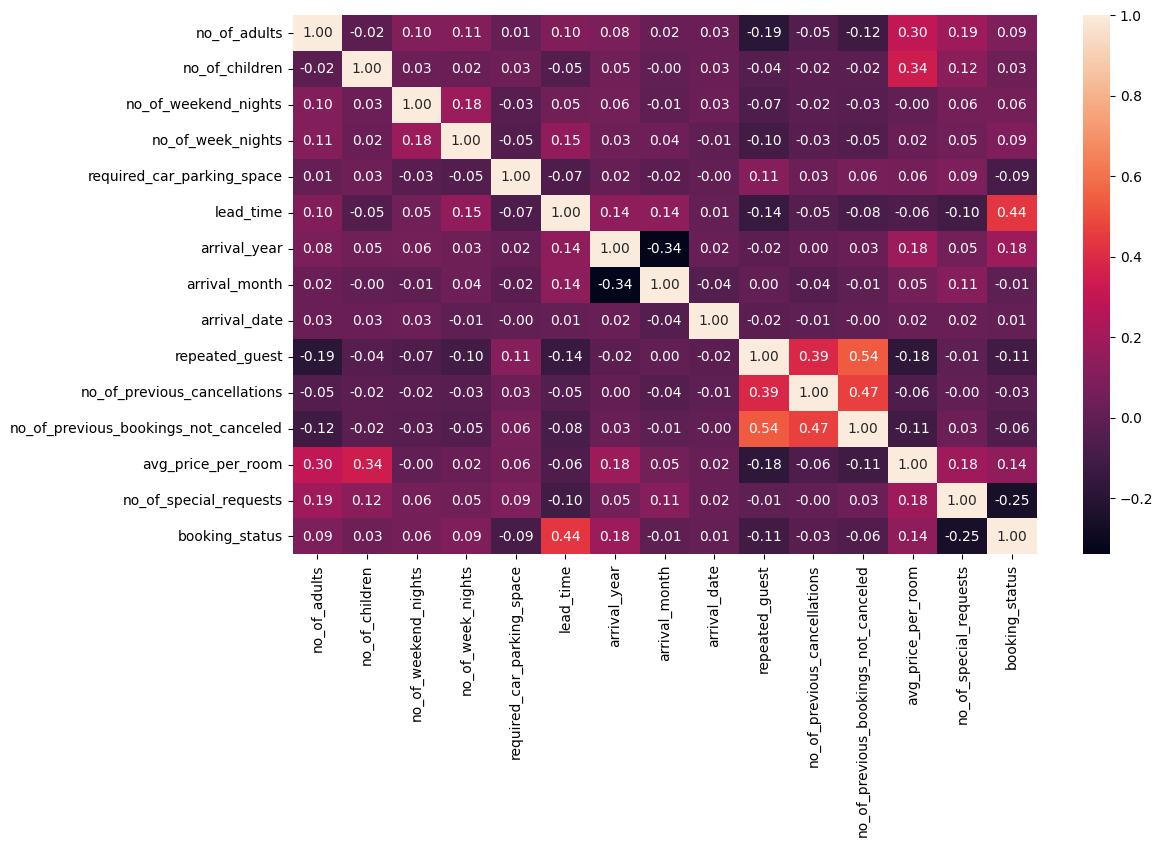

In [19]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

## Preparing data for models

In [20]:
X= data.drop(columns = ['booking_status'])
Y= data.booking_status

In [21]:
X = pd.get_dummies(X, drop_first=True)

In [22]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [23]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=42)

# Building Models

We would try following models for this classification task:


*   Logistic Regression
*   Random Forest
*   Xtreme Gradient Boost
*   KNN (nearest Neighbors)


We would try following steps for these models:


*   Train model
*   Look at feature importance
*   Try with best params
*   Try hyper parameter tuning where applicable
*   Evaluate training and test score


## Criteria for Evaluating Models

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem on hand.**

**Model can make wrong predictions as:**
* Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
* Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking.

**Which case is more important?**

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity.

**How to reduce the losses?**
We would want F1 Score to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [24]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Logistic Regression

Accuracy on Training data:  0.8019061121613107
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17114
           1       0.73      0.62      0.67      8278

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.80      0.80      0.80     25392



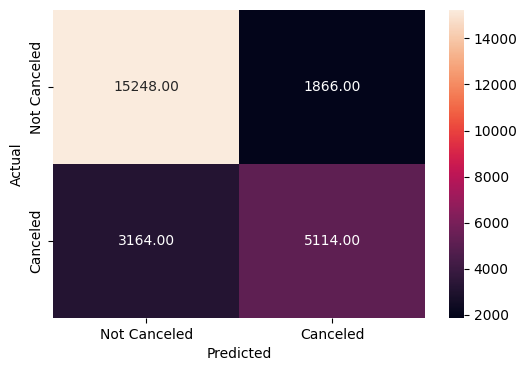

None
Test Accuracy: 0.8033630432785077
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7276
           1       0.75      0.61      0.67      3607

    accuracy                           0.80     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883



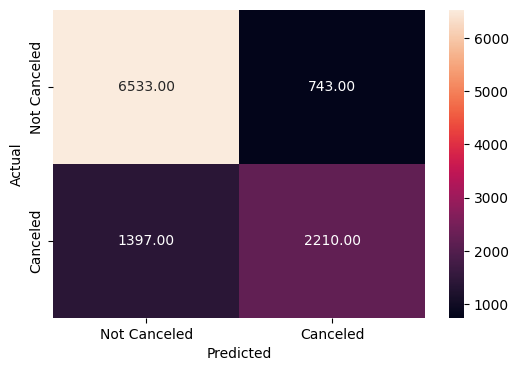

None


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression model
model1="Logistic Regression"

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Accuracy on training data
y_pred_train_lr = lr_model.predict(X_train)
train_accuracy = accuracy_score(y_pred_train_lr,y_train)
print(f"Accuracy on Training data: ",train_accuracy)

#print(classification_report(y_train, y_pred_train_lr))
print(metrics_score(y_train, y_pred_train_lr))

# Predictions and model evaluation on test data
y_pred_test_lr = lr_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_lr)
print(f'Test Accuracy: {test_accuracy}')
print(metrics_score(y_test, y_pred_test_lr))


**Feature Importances**


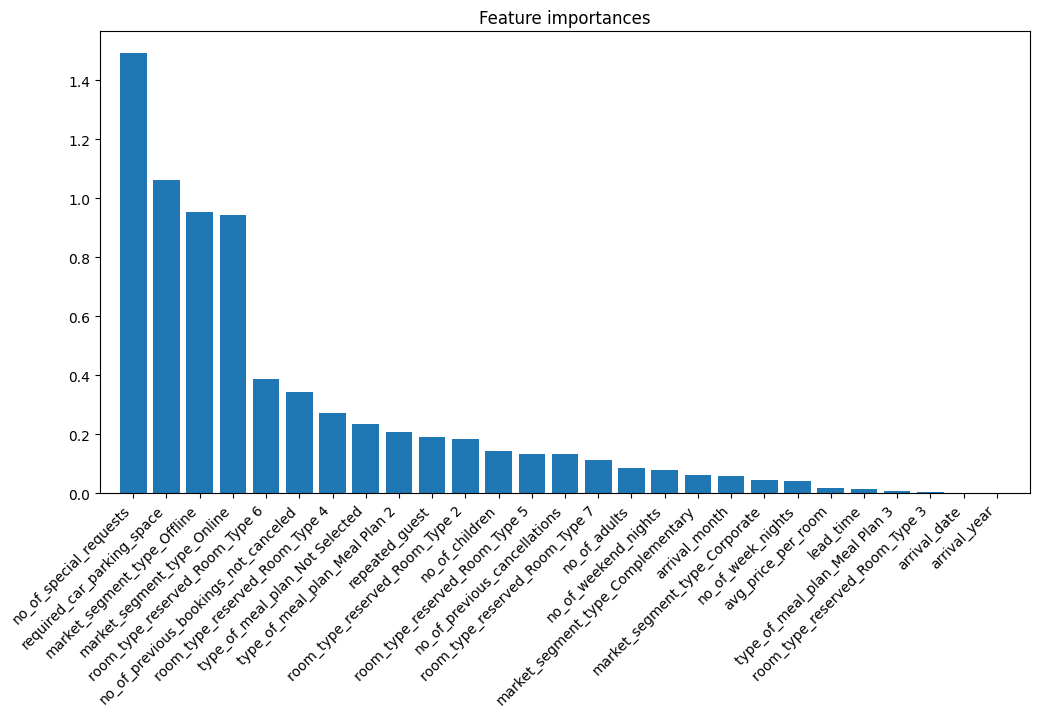

In [26]:
importances = abs(lr_model.coef_[0])

import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], align="center")

# get the original DataFrame column names for the x-ticks
plt.xticks(range(len(importances)), X.columns[indices], rotation=45, ha="right")
plt.xlim([-1, len(importances)])
plt.show()

**Hyperparameter Tuning**

Let us do hyperparameter tuning to find best parameters

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear'],
    'penalty': ['l2'],
    'max_iter': [100, 200, 500, 1000]
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Best parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy on Training data:  0.7980072463768116
              precision    recall  f1-score   support

           0       0.82      0.89      0.86     17114
           1       0.73      0.60      0.66      8278

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392



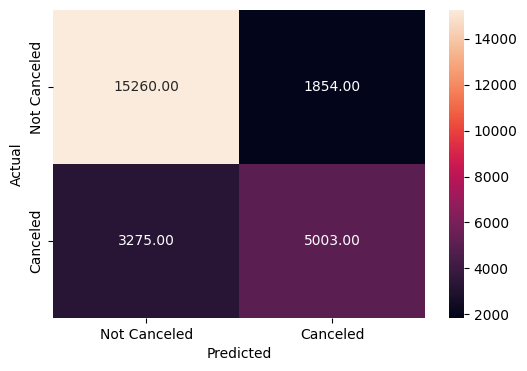

None
Test Accuracy: 0.8002389047137738
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7276
           1       0.74      0.61      0.67      3607

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.79     10883



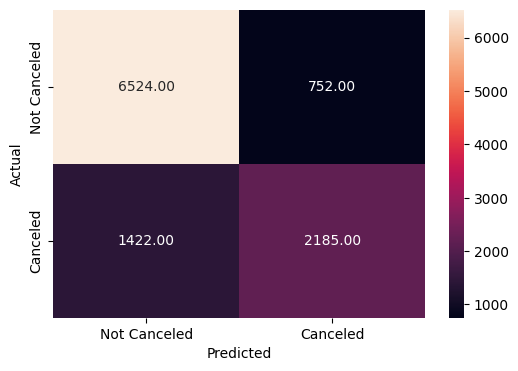

None


In [28]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

optimized_lr_model = LogisticRegression(**best_params)

optimized_lr_model.fit(X_train, y_train)


# Accuracy on training data
y_pred_train_lr = optimized_lr_model.predict(X_train)
train_accuracy = accuracy_score(y_pred_train_lr,y_train)
print(f"Accuracy on Training data: ",train_accuracy)
print(metrics_score(y_train, y_pred_train_lr))

# Predictions and model evaluation on test data
y_pred_test_lr = optimized_lr_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_lr)
print(f'Test Accuracy: {test_accuracy}')
print(metrics_score(y_test, y_pred_test_lr))

## Random Forest

Accuracy on Training data:  99.42895400126024
Accuracy on Test data:  90.21409537811266
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17114
           1       1.00      0.99      0.99      8278

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



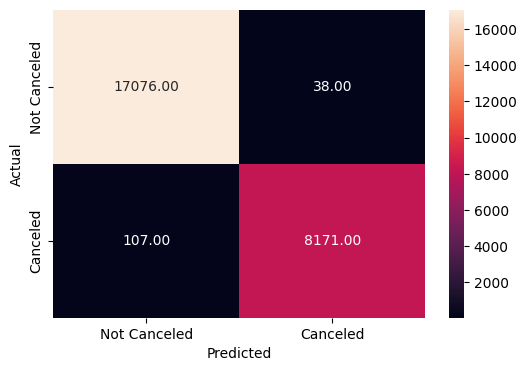

None
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7276
           1       0.89      0.81      0.85      3607

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



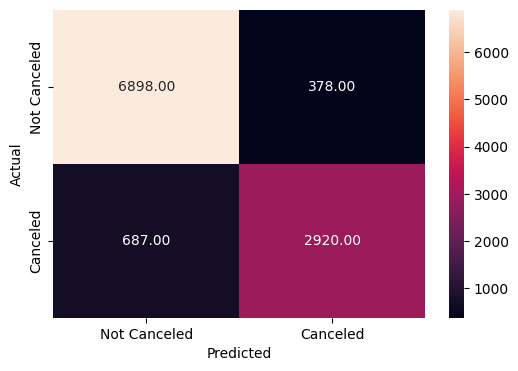

None


In [29]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
# training the model with training data
rf.fit(X_train,y_train)
# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_rf*100)


print(metrics_score(y_train, X_train_prediction))
print(metrics_score(y_test, X_test_prediction))

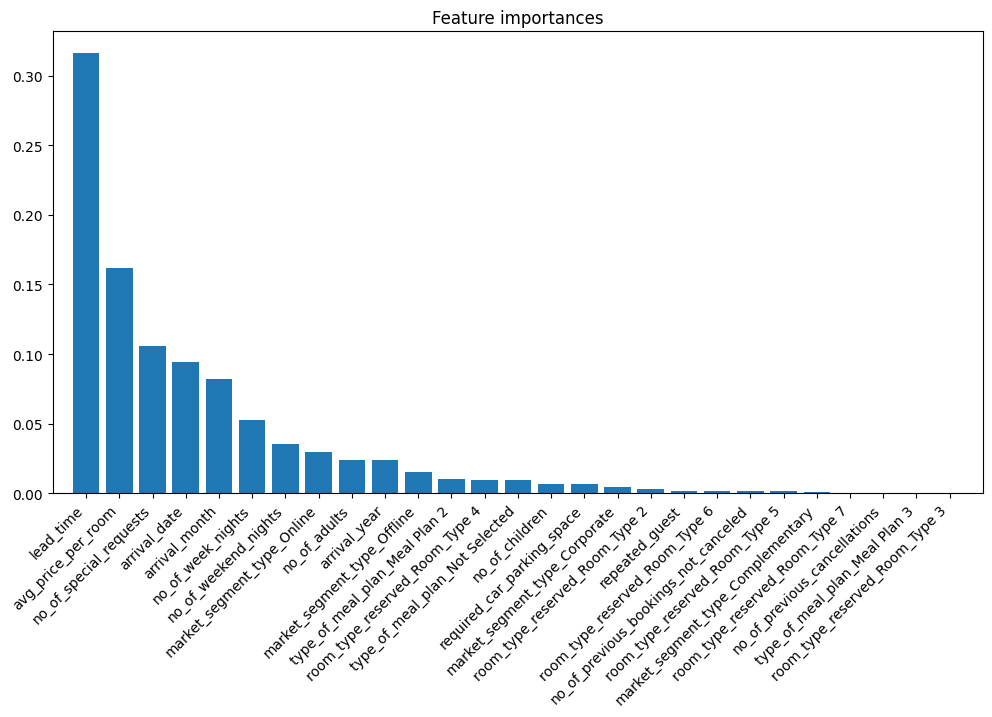

In [30]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(len(importances)), importances[indices], align="center")

# Use the original DataFrame column names for the x-ticks
plt.xticks(range(len(importances)), X.columns[indices], rotation=45, ha="right")
plt.xlim([-1, len(importances)])
plt.show()

## KNN

Accuracy on Training data:  0.8635396975425331
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     17114
           1       0.84      0.72      0.77      8278

    accuracy                           0.86     25392
   macro avg       0.86      0.83      0.84     25392
weighted avg       0.86      0.86      0.86     25392



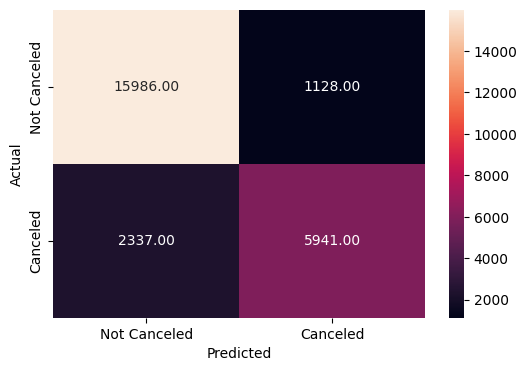

None
Test Accuracy: 0.8066709546999908
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      7276
           1       0.75      0.63      0.68      3607

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



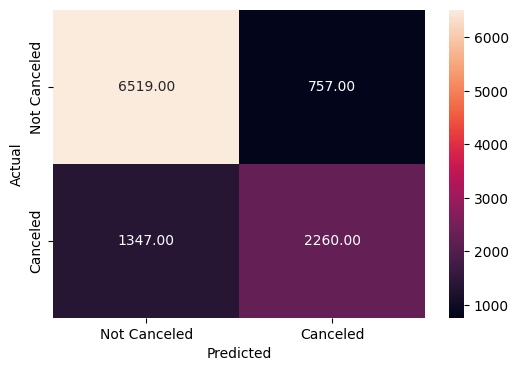

None


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Create a KNN model
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Evaluate the model
# Accuracy on training data
y_pred_train_knn = knn_model.predict(X_train)
train_accuracy = accuracy_score(y_pred_train_knn,y_train)
print(f"Accuracy on Training data: ",train_accuracy)
print(metrics_score(y_train, y_pred_train_knn))

# Predictions and model evaluation on test data
y_pred_test_knn = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_knn)
print(f'Test Accuracy: {test_accuracy}')
print(metrics_score(y_test, y_pred_test_knn))


In [32]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create GridSearchCV
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='recall')
grid_search_knn.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search_knn.best_params_)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


Accuracy on Training data:  0.9935806553245117
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17114
           1       1.00      0.99      0.99      8278

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



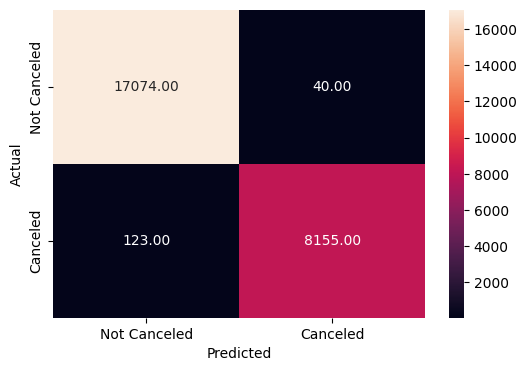

None
Test Accuracy: 0.831020858219241
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      7276
           1       0.76      0.72      0.74      3607

    accuracy                           0.83     10883
   macro avg       0.81      0.80      0.81     10883
weighted avg       0.83      0.83      0.83     10883



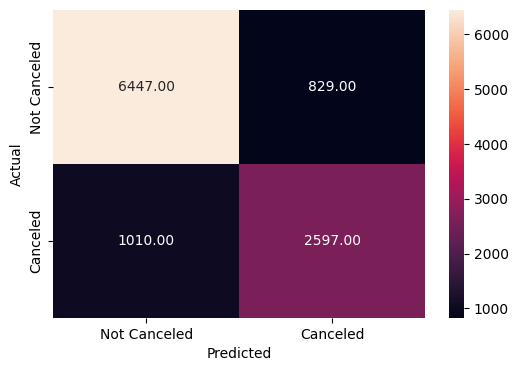

None


In [33]:
# Create and fit the optimized model
# Create optimized KNN model
knn_model_optimized = KNeighborsClassifier(**grid_search_knn.best_params_)

# Fit the model to the training data
knn_model_optimized.fit(X_train, y_train)

# Evaluate the model
# Accuracy on training data
y_pred_train_knn_optimized = knn_model_optimized.predict(X_train)
train_accuracy = accuracy_score(y_pred_train_knn_optimized,y_train)
print(f"Accuracy on Training data: ",train_accuracy)
print(metrics_score(y_train, y_pred_train_knn_optimized))

# Predictions and model evaluation on test data
y_pred_test_knn_optimized = knn_model_optimized.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_knn_optimized)
print(f'Test Accuracy: {test_accuracy}')
print(metrics_score(y_test, y_pred_test_knn_optimized))


## XGB Classifier

Accuracy on Training data:  0.9216682419659735
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     17114
           1       0.91      0.85      0.88      8278

    accuracy                           0.92     25392
   macro avg       0.92      0.90      0.91     25392
weighted avg       0.92      0.92      0.92     25392



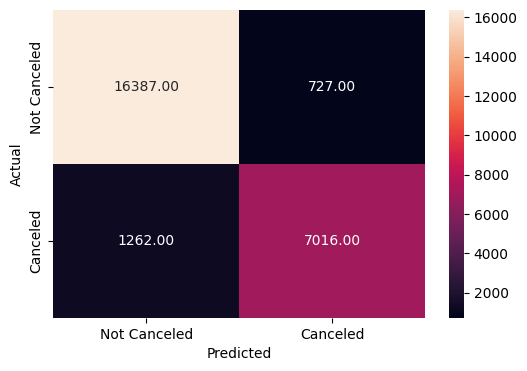

None
Test Accuracy: 0.8929523109436737
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7276
           1       0.86      0.80      0.83      3607

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



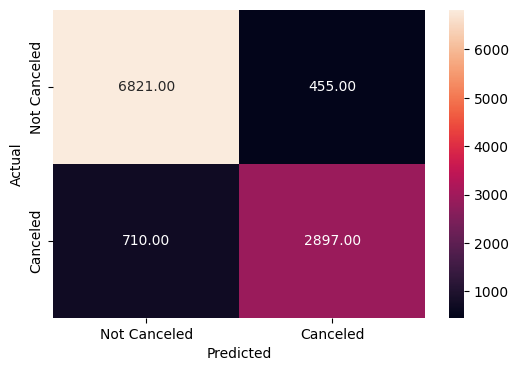

None


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Create an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)


# Evaluate the model
# Accuracy on training data
y_pred_train_xgb = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_pred_train_xgb,y_train)
print(f"Accuracy on Training data: ",train_accuracy)
print(metrics_score(y_train, y_pred_train_xgb))

# Predictions and model evaluation on test data
y_pred_test_xgb = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_xgb)
print(f'Test Accuracy: {test_accuracy}')
print(metrics_score(y_test, y_pred_test_xgb))

In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Create GridSearchCV
grid_search_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5, scoring='recall')
grid_search_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search_xgb.best_params_)


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}


Accuracy on Training data:  0.9299385633270322
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     17114
           1       0.92      0.86      0.89      8278

    accuracy                           0.93     25392
   macro avg       0.93      0.91      0.92     25392
weighted avg       0.93      0.93      0.93     25392



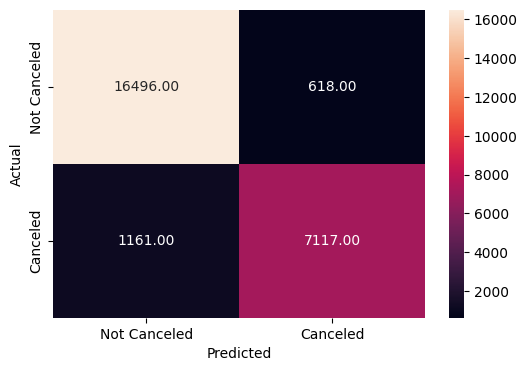

None
Test Accuracy: 0.8920334466599283
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7276
           1       0.86      0.80      0.83      3607

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



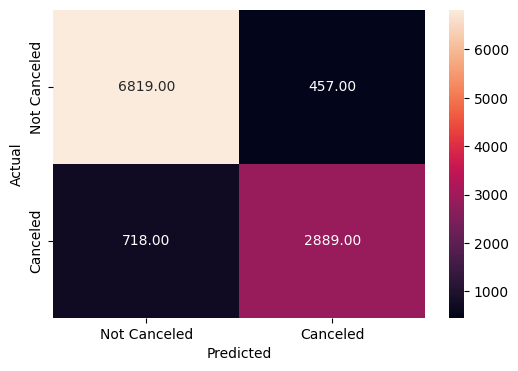

None


In [36]:
# Create and fit the optimized model
# Create optimized KNN model
xgb_model_optimized = XGBClassifier(**grid_search_xgb.best_params_, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_model_optimized.fit(X_train, y_train)

# Evaluate the model
# Accuracy on training data
y_pred_train_xgb_optimized = xgb_model_optimized.predict(X_train)
train_accuracy = accuracy_score(y_pred_train_xgb_optimized,y_train)
print(f"Accuracy on Training data: ",train_accuracy)
print(metrics_score(y_train, y_pred_train_xgb_optimized))

# Predictions and model evaluation on test data
y_pred_test_xgb_optimized = xgb_model_optimized.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test_xgb_optimized)
print(f'Test Accuracy: {test_accuracy}')
print(metrics_score(y_test, y_pred_test_xgb_optimized))

# Results Summary and Conclusion

**Conclusion:**

*   Various models were tried to identify important factors that contribute to booking cancelation
*   XGB model gave best overall results with not much drop from training to test data. It had f1-score average of 92% for training data nd 88% for test data

**Business Recommendations:**
*   Bookings through online segment had much more chance of being canceled in comparison to those through offline channel. Hotel can do some direct promotion
*   They can also try to see why some guests are not selecting meal plans. They can try to encourage that.
*   They can use selected model to identify guests who are likely to cancel and contact them few days before their booking to reconfirm.